# Classification and Regression Trees



    
## Assignment overview

Decision trees are a non-parametric supervised learning method used for classification and regression. Decision trees learn from data to approximate a curve with a set of if-then-else decision rules. The deeper the tree, the more complex the decision rules and the fitter the model.
Decision trees build classification or regression models in the form of trees. They break down a data set into smaller and smaller subsets while incrementally developing the associated decision tree. The final result is a tree with decision nodes and leaf nodes. A decision node has two or more branches. Leaf nodes represent a classification or decision. The topmost decision node in a tree, which corresponds to the best predictor, is called the root node. 



This assignment is designed to help you apply the machine learning algorithms you have learnt using packages in Python. Python concepts, instruction, and starter code are embedded within this Jupyter Notebook to help guide you as you progress through the assignment. Remember to run the code of each code cell prior to submitting the assignment. Upon completing the assignment, we encourage you to compare your work against the solution file to perform a self-assessment.


## Index:

#### Week 9:   Classification and regression trees


- [Part 1](#part1)- Importing the data set and exploratory data analysis (EDA)
- [Part 2](#part2)- Translate the categorical predictors into numerical predictors
- [Part 3](#part3)- Shuffle the data set
- [Part 4](#part4)- Calculate the accuracy of the Naïve benchmark on the validation set.
- [Part 5](#part5)- Train a decision tree using the default settings
- [Part 6](#part6)- Train a decision tree using different maximum depths for the tree
- [Part 7](#part7)- Retrain the best classifier using all the samples



## Classification and regression trees

In Week 9, you learnt about classification using regression trees.
The basic idea behind the algorithm for classification via regression trees can be summarised as follows:

- Load the data set
- Select the best attribute using Attribute Selection Measures (ASM) to split the records.
- Make that attribute a decision node and break the data set into smaller subsets.
- Start building the tree by repeating this process recursively for each child until one of the conditions will match:
    - All the tuples belong to the same attribute value.
    - There are no more remaining attributes.
    - There are no more instances.


## Predict defaults for student loans applications

For this exercise, we will use the data set `loandata.xlsx` to predict defaults for student loans applications using regression trees. We will perform the following steps:

1. Load the data set `loandata.xlsx` into Python.
2. Translate the categorical predictors into numerical predictors. 
3. Shuffle the data set and split it into 50% training data, 25% validation data and 25% test data.
4. Calculate the accuracy of the Naïve benchmark  on the validation set.
5. Train a decision tree using the default settings.
6. Retry the previous step using different maximum depths for the tree. 
7. Choose the most appropriate tree depth and justify your choice. Re-train the best classifier using all the samples from both the training and the validation set. Retrain the best classifier on all samples (including the test set) and describe the tree that you obtain.

[Back to top](#Index:) 

<a id='part1'></a>

### Part 1 -  Importing the data set and exploratory data analysis (EDA)

We begin by importing the necessary libraries. We will then use `pandas` to import the data set. 

In [72]:
import numpy as np
import pandas as pd
from sklearn import tree, ensemble

Notice that this week's data set is in `.xlsx` format.

Complete the code cell below by adding the name of the data set as a `str` to `.read_excel()`. Assign the dataframe to the variable `df`.

In [73]:
df =  pd.read_excel('loandata.xlsx')


Before building any machine learning algorithms, we should explore the data.

We begin by visualising the first ten rows of the dataframe `df` using the function `.head()`. By default, `.head()` displays the first five rows of a dataframe.

Complete the code cell below by passing the desired number of rows as an `int` to the function `.head()`.

In [74]:
df.head(10)

,field,graduationYear,loanAmount,selectiveCollege,sex,Default
0,STEM,2006,23159.580541,0,Male,No
1,HUMANITIES,2010,47498.061207,0,Male,Yes
2,HUMANITIES,2012,29637.519526,0,Female,No
3,STEM,2008,25369.577159,1,Female,No
4,BUSINESS,2013,42398.554574,0,Male,Yes
5,HUMANITIES,2012,39253.384259,1,Female,Yes
6,STEM,2005,48903.966851,1,Male,No
7,STEM,2007,30687.019114,1,Male,No
8,STEM,2005,31999.816866,0,Male,No
9,HUMANITIES,2005,45120.419948,0,Female,Yes


For your convenience, here is a brief description of what some of the columns represent:
    
- field: the field in which each student is taking their studies in
- graduationYear: the year in which each student graduated
- loanAmount: the amount each student owns
- selectiveCollege: binary valued column: 1 for students who attend a selective college, 0 for students that do not
- sex: sex of the student


[Back to top](#Index:) 

<a id='part2'></a>

### Part 2 -  Translate the categorical predictors into numerical predictors

How do we handle categorical features?

In most of the well-established machine learning systems, categorical variables are handled naturally. However, when dealing with decision trees using `scikit-learn`, we need to encode (translate) categorical features into numerical features.

Arguably, the easiest way to achieve this is by using the `pandas` function `get_dummies()` that converts categorical variables into dummy/indicator variables.





**Answer Question 1 on your assignment page**

Complete the code cell below by using the function on the dataframe `df`.

In [75]:
#encode categorical variables 
df=pd.get_dummies(df)
df.head()


,graduationYear,loanAmount,selectiveCollege,field_BUSINESS,field_HUMANITIES,field_STEM,sex_Female,sex_Male,Default_No,Default_Yes
0,2006,23159.580541,0,False,False,True,False,True,True,False
1,2010,47498.061207,0,False,True,False,False,True,False,True
2,2012,29637.519526,0,False,True,False,True,False,True,False
3,2008,25369.577159,1,False,False,True,True,False,True,False
4,2013,42398.554574,0,True,False,False,False,True,False,True


Because we are only interested in the students that will apply for a student loan,  we will only need to keep the column `Default_Yes`.

Complete the code cell below by using the function `.drop()` on `df` to eliminate the *column* `Default_no`. The `axis` parameter in `.drop()` controls whether the function acts on rows or columns.



In [76]:
#drop Default_No
# Assuming df is the DataFrame
df = df.drop("Default_No", axis=1)

Run the code cell below to visualise the new dataframe with the encoded columns.

In [77]:
df

,graduationYear,loanAmount,selectiveCollege,field_BUSINESS,field_HUMANITIES,field_STEM,sex_Female,sex_Male,Default_Yes
0,2006,23159.580541,0,False,False,True,False,True,False
1,2010,47498.061207,0,False,True,False,False,True,True
2,2012,29637.519526,0,False,True,False,True,False,False
3,2008,25369.577159,1,False,False,True,True,False,False
4,2013,42398.554574,0,True,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...
1995,2006,34593.557949,0,True,False,False,True,False,False
1996,2009,35146.672010,0,False,True,False,True,False,True
1997,2012,47883.543619,0,False,False,True,False,True,False
1998,2006,42817.102001,1,True,False,False,True,False,False


[Back to top](#Index:) 

<a id='part3'></a> 

### Part 3 - Shuffle the data set

Now, we want to shuffle the data: one way of doing this is by converting our dataframe to a `NumPy` array and then using the `.shuffle()` function to achieve this. Run the code cell below to convert the `df` into a `NumPy` array.

In [9]:
Xy=np.array(df)

For reproducibility, set the random seed = 2. You can do this by using the `NumPy` function `random.seed()`. Assign your seed to the variable `seed`. Next, complete the code cell below by using the function `random.shuffle()` on `Xy`.

In [10]:
seed = np.random.seed(2)
np.random.shuffle(Xy)

Before splitting the data into a training set, a test set, and a validation set, we need to divide `Xy` into two arrays: the first one, `X`, a 2D array containing all the predictors and the second, `y`, is a 1D array with the response. 

Run the code cell below to generate `X`. Complete the remaining code to define `y`.

In [11]:
X=Xy[:,:-1]

In [12]:
#define y
y= Xy[:,-1]

Because we need to split the data into sets with certain dimensions according to the instructions given above, it would be useful to know how big our X and y are.

Run the code cell below to retrieve this information.

In [13]:
print(len(X))
print(len(y))

2000
2000


Next, we need to split the messages  into 50% training data, 25% validation data, and 25% test data.

Run the code below to split `X` into training, validation and test sets.

In [14]:
trainsize = 1000
trainplusvalsize = 500
X_train=X[:trainsize]
X_val=X[trainsize:trainsize + trainplusvalsize]
X_test=X[trainsize + trainplusvalsize:]


Following the syntax used above, complete the cell below to split `y` into training set, a validation set, and a test set.

**HINT:** Remember that `y` is a 1D array!

In [15]:
y_train=y[:trainsize]
y_val=y[trainsize:trainsize + trainplusvalsize]
y_test=y[trainsize + trainplusvalsize:]

[Back to top](#Index:)

<a id='part4'></a>

### Part 4 - Calculate the accuracy of the Naïve benchmark on the validation set

In this part, we want to calculate the accuracy of the Naïve benchmarch on both the `y` training and validation sets. In other words, we want to understand how accurate our predictions would be if we assumed that no one defaulted on their student loans.

Accuracy can be computed by comparing actual test set values and predicted values. In this example, the formulae to compute accuracy are:

$$\text{acc_train} = 1 - \frac{\sum{\text{y_train}}}{\text{len(y_train)}},$$

$$ \text{acc_val} = 1 - \frac{\sum{\text{y_val}}}{\text{len(y_val)}}.$$

Note that $\frac{\sum{\text{y_train}}}{\text{len(y_train)}}$ reflects the proportion of students who defaulted on their loan in the training set, and $\frac{\sum{\text{y_val}}}{\text{len(y_val)}}$ reflects the proportion of students who defaulted on their loan in the validation set.

Compute the required accuracy in the code cell below.

In [16]:
acc_train = 1 - np.sum(y_train)/len(y_train)
acc_val = 1 - np.sum(y_val)/len(y_val)


Run the code cell below to print the results to screen. What can you say about the baseline accuracy if we predict that no students defaulted (i.e., everyone belongs to the majority class)?

In [17]:
print ( 'Naïve guess train and validation', acc_train , acc_val)

Naïve guess train and validation 0.778 0.75



**Answer Questions 2 and 3 on your assignment page**

[Back to top](#Index:) 

<a id='part5'></a>

### Part 5 - Train a decision tree using the default settings

The easiest way to create a decision tree model is by using the function `DecisionTreeClassifier()`. This function is part of the `tree` module of `Scikit-learn` (`sklearn`).

As we will see, there are ways to improve the accuracy of our tree. For now, let's build a classifier using the default settings.

In the code cell below, use `DecisionTreeClassifier()` to define a classifier `clf` . Next, use the method `fit()` of your classifier to fit your training sets, `X_train` and `y_train`.

In [29]:
clf = tree.DecisionTreeClassifier()
#Fit X_train and y_train
y_train = y_train.astype(int)
y_val = y_val.astype(int)
clf.fit(X_train, y_train)


DecisionTreeClassifier()

Run the code cell below to visualize the new scores on the training and validation sets.

In [19]:
print ( 'Full tree guess train/validation ',clf.score(X_train, y_train),clf.score(X_val, y_val))


Full tree guess train/validation  1.0 0.816



**Answer Questions 4 and 5 on your assignment page**

[Back to top](#Index:) 

<a id='part6'></a>

### Part 6 - Train a decision tree using  different maximum depths for the tree

One way we can optimise the decision tree algorithm is by adjusting the maximum depth of the tree. This process is an example of pre-pruning. 

In the following example, we will compute the score for  a decision tree on the same data with `max_depth = 15`.

We begin by defining the variables `bestdepth` and `bestscore`, assuming the *worst case scenario*. Run the code cell below to initialise the variable as desired.

In [20]:
bestdepth=-1
bestscore=0
max_depth = 15

Next, we will write a for loop to progressively compute the new train/validation scores for different depths.

Here is the pseudocode for the for loop you will need to implement:

```python

for i in range(max_depth):
    # compute new classifier clf with depth = max_depth = i+1
    # fit the X and y training sets with the new classifier
    # compute the updated trainscore using .score() on the training set 
    # compute the updated valscore using .score() on the validation set
    # print the scores
    print ( 'Depth:', i+1, 'Training Score:', trainscore, 'Validation Score:', valscore)
     
    # if valscore is better than bestscore:
        # update the value of bestscore
        # increase bestdepth by one unit
    
```

In [21]:
for i in range(15):
    clf = tree.DecisionTreeClassifier(max_depth=i+1)
    #fit the training sets
    clf.fit(X_train, y_train)
    #update trainscore
    trainscore=clf.score(X_train, y_train)
    #update valscore
    valscore=clf.score(X_val, y_val)
    print( 'Depth:', i+1, 'Train Score:', trainscore, 'Validation Score:', valscore)
    if valscore > bestscore:
        #update bestscore
        bestscore=valscore
        #update depth
        bestdepth=i+1


print('Bestscore: ', bestscore, 'Bestdepth: ',bestdepth)

Depth: 1 Train Score: 0.839 Validation Score: 0.81
Depth: 2 Train Score: 0.891 Validation Score: 0.872
Depth: 3 Train Score: 0.891 Validation Score: 0.872
Depth: 4 Train Score: 0.891 Validation Score: 0.872
Depth: 5 Train Score: 0.896 Validation Score: 0.86
Depth: 6 Train Score: 0.914 Validation Score: 0.84
Depth: 7 Train Score: 0.922 Validation Score: 0.846
Depth: 8 Train Score: 0.934 Validation Score: 0.832
Depth: 9 Train Score: 0.95 Validation Score: 0.806
Depth: 10 Train Score: 0.968 Validation Score: 0.812
Depth: 11 Train Score: 0.978 Validation Score: 0.818
Depth: 12 Train Score: 0.987 Validation Score: 0.822
Depth: 13 Train Score: 0.993 Validation Score: 0.81
Depth: 14 Train Score: 0.996 Validation Score: 0.82
Depth: 15 Train Score: 0.998 Validation Score: 0.818
Bestscore:  0.872 Bestdepth:  2


Choose the most appropriate tree depth.

**Answer Questions 6 and 7 on your assignment page**

[Back to top](#Index:) 

<a id='part7'></a>

### Part 7 - Retrain the best classifier using all the samples

For the last part of this assignment, retrain the best classifier using all the samples from the training and the validation sets *together*. 

We begin by re-defining our `X_trainval` and `y_trainval`. Below, we have defined `X_trainval` for you.

In [22]:
X_trainval=X[:trainsize + trainplusvalsize,:]

Following the syntax given above, define `y_trainval`.

Again, remember that `y` is a 1D array! 

In [23]:
y_trainval = y[:trainsize + trainplusvalsize]
y_trainval = y_trainval.astype(int)

To re-train the sets using the best classifier, re-define `clf`  using `DecisionTreeClassifier()` with `max_depth` equal to the `bestdepth` computed in Part 6. Next, fit the classifiers to the sets just defined above.

Complete the code cell below:

In [62]:
clf = tree.DecisionTreeClassifier(max_depth=2)
#fitX_trainval and y_trainval
clf.fit(X_trainval,y_trainval)

DecisionTreeClassifier(max_depth=2)

Finally, re-train the best classifier on all samples (including the test set).

Do so by using the function `score()` to compute the score on the test set. Assign the result to `test_score`.

Please note that once you include the test set in training, its score is no longer a good predictor of the accuracy of the model. Including the test set in training can, however, improve the generalisability of the model.
 
 


In [63]:
test_score = clf.score(X_test, y_test.astype(int))


In [64]:
print('testing set score', test_score)

testing set score 0.882


[Text(0.5, 0.8333333333333334, 'x[4] <= 0.5\ngini = 0.356\nsamples = 1500\nvalue = [1153, 347]'),
 Text(0.25, 0.5, 'x[5] <= 0.5\ngini = 0.117\nsamples = 1025\nvalue = [961, 64]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.29\nsamples = 284\nvalue = [234, 50]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.037\nsamples = 741\nvalue = [727, 14]'),
 Text(0.75, 0.5, 'x[0] <= 2009.5\ngini = 0.482\nsamples = 475\nvalue = [192, 283]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.437\nsamples = 233\nvalue = [158, 75]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.242\nsamples = 242\nvalue = [34, 208]')]

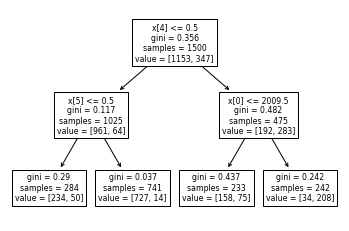

In [65]:
from sklearn import tree
tree.plot_tree(clf)


In [85]:
df1.columns.values

array(['field', 'graduationYear', 'loanAmount', 'selectiveCollege', 'sex',
       'Default'], dtype=object)

[Text(0.5, 0.8333333333333334, 'field_HUMANITIES <= 0.5\ngini = 0.356\nsamples = 100.0%\nvalue = [0.769, 0.231]\nclass = No'),
 Text(0.25, 0.5, 'field_STEM <= 0.5\ngini = 0.117\nsamples = 68.3%\nvalue = [0.938, 0.062]\nclass = No'),
 Text(0.125, 0.16666666666666666, 'gini = 0.29\nsamples = 18.9%\nvalue = [0.824, 0.176]\nclass = No'),
 Text(0.375, 0.16666666666666666, 'gini = 0.037\nsamples = 49.4%\nvalue = [0.981, 0.019]\nclass = No'),
 Text(0.75, 0.5, 'graduationYear <= 2009.5\ngini = 0.482\nsamples = 31.7%\nvalue = [0.404, 0.596]\nclass = Yes'),
 Text(0.625, 0.16666666666666666, 'gini = 0.437\nsamples = 15.5%\nvalue = [0.678, 0.322]\nclass = No'),
 Text(0.875, 0.16666666666666666, 'gini = 0.242\nsamples = 16.1%\nvalue = [0.14, 0.86]\nclass = Yes')]

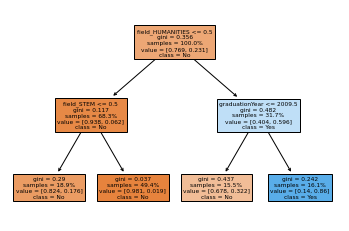

In [88]:
tree.plot_tree(clf,feature_names=df.columns.values,  
                   class_names=['No', 'Yes'],
                   proportion=True,
                   filled=True)

 What do you observe?

**Answer Questions 8 and 9 on your assignment page**